In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage

In [14]:
wine = pd.read_csv("Wine.csv")


In [15]:
wine1 = df.iloc[:, 1:]

In [16]:
wine1.head()

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [17]:
wine1.describe()

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [18]:
cor = wine1.corr()

In [19]:
cor.style.background_gradient(cmap='coolwarm')

,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
Malic_Acid,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
Ash,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
Ash_Alcanity,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
Magnesium,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
Total_Phenols,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
Flavanoids,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
Nonflavanoid_Phenols,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
Proanthocyanins,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
Color_Intensity,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668
Hue,-0.561296,-0.074667,-0.273955,0.055398,0.433681,0.543479,-0.262640,0.295544,-0.521813,1.000000,0.565468,0.236183,-0.617369


In [28]:
wine_norm = StandardScaler().fit_transform(wine1) # normalizing the data

In [29]:
pca = PCA(n_components=13)

In [30]:
principalComponents = pca.fit_transform(wine_norm)

In [32]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(wine_norm)
pca_values 

array([[-3.31049   , -1.20531167, -0.39262795, ...,  0.8608444 ,
         0.29415073,  0.14225964],
       [-2.512443  ,  0.667054  , -1.91942034, ...,  0.25907195,
         0.19344183,  0.18067854],
       [-2.74230813, -1.49811831,  0.55442822, ..., -0.14563125,
         0.00445644, -0.00535404],
       ...,
       [ 3.19824118, -2.42855744, -1.66539705, ...,  0.49860938,
        -0.09885035,  0.04649047],
       [ 2.88823727, -2.09144243, -1.17577634, ...,  0.2514622 ,
         0.14389536,  0.1395016 ],
       [ 3.78593608, -2.1378555 ,  0.8851532 , ...,  0.08777553,
         0.10516644, -0.35843494]])

In [33]:
pca.components_

array([[ 0.23341804,  0.00710486,  0.22106807, -0.11649233, -0.35960357,
        -0.39409075,  0.26969493, -0.28169901,  0.11288738, -0.28933235,
        -0.35954123, -0.25428758,  0.39487114],
       [-0.22645962, -0.45526141, -0.08547995, -0.40818004, -0.13707949,
        -0.06657558, -0.01402671, -0.12896481, -0.53701108,  0.27460233,
         0.12170971, -0.38563437,  0.01300346],
       [ 0.04523628,  0.54414942,  0.62587035, -0.04475131,  0.10491812,
         0.12981263,  0.21908263,  0.07712448, -0.30001515,  0.18401657,
         0.21450841, -0.23749699, -0.00665771],
       [ 0.49894597, -0.22351277,  0.08298156, -0.31275345,  0.20983946,
         0.16191271, -0.24327222,  0.43111719,  0.05283615, -0.40938096,
         0.19203625, -0.25574001,  0.0918546 ],
       [-0.04656116, -0.1150528 ,  0.18583998,  0.69147392, -0.15366478,
        -0.09936823, -0.52922855,  0.09424949, -0.22813761, -0.03132209,
        -0.02647016, -0.25760499,  0.17140785],
       [-0.64583384, -0.136619

In [34]:
var = pca.explained_variance_ratio_
var

array([0.41957898, 0.15585708, 0.10501915, 0.07113755, 0.06283068,
       0.05061871, 0.04224382, 0.0252395 , 0.02093304, 0.01789693,
       0.01398795, 0.0100125 , 0.0046441 ])

In [35]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([41.96, 57.55, 68.05, 75.16, 81.44, 86.5 , 90.72, 93.24, 95.33,
       97.12, 98.52, 99.52, 99.98])

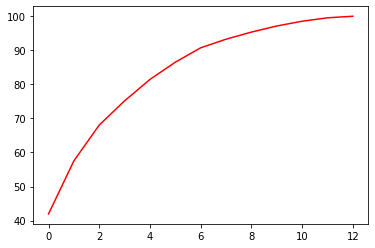

In [36]:
plt.plot(var1,color="red")

In [37]:
 pca_values[:,0:1]

array([[-3.31049   ],
       [-2.512443  ],
       [-2.74230813],
       [-3.63540255],
       [-1.35965797],
       [-3.04328658],
       [-2.50948277],
       [-2.18821596],
       [-2.49904275],
       [-2.85954166],
       [-3.48510184],
       [-1.92501736],
       [-2.30696624],
       [-3.38730053],
       [-4.17468098],
       [-2.46381153],
       [-2.21456272],
       [-2.05792726],
       [-3.48350644],
       [-2.27334093],
       [-3.17387819],
       [-1.49447735],
       [-2.74177292],
       [-2.05905287],
       [-2.0707949 ],
       [-1.38527457],
       [-2.05652713],
       [-1.58743853],
       [-2.37558101],
       [-2.41160266],
       [-2.6410305 ],
       [-2.80545967],
       [-1.9004233 ],
       [-2.08972702],
       [-1.69782833],
       [-2.16632263],
       [-1.71262801],
       [-1.51701048],
       [-1.89314482],
       [-2.56663671],
       [-2.74790194],
       [-1.03699738],
       [-3.14937651],
       [-0.86013374],
       [-2.40411264],
       [-1

In [44]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), wine[['Customer_Segment']]], axis = 1)
finalDf

,pc1,pc2,Customer_Segment
0,-3.310490,-1.205312,1
1,-2.512443,0.667054,1
2,-2.742308,-1.498118,1
3,-3.635403,-2.539204,1
4,-1.359658,-1.336899,1
...,...,...,...
173,3.846387,-1.490067,3
174,3.086036,-1.433712,3
175,3.198241,-2.428557,3
176,2.888237,-2.091442,3


In [45]:
import matplotlib.pyplot as plt
plt.style.use('classic')

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

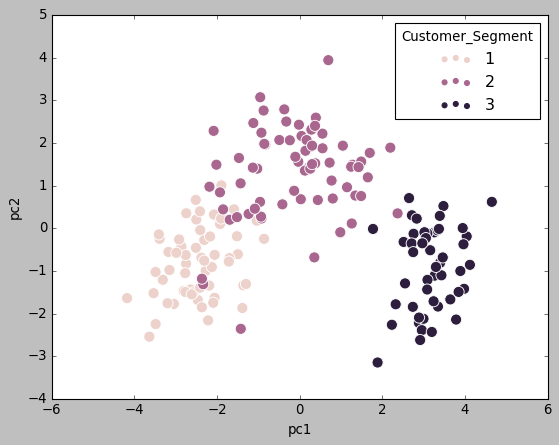

In [48]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Customer_Segment',s = 100)  

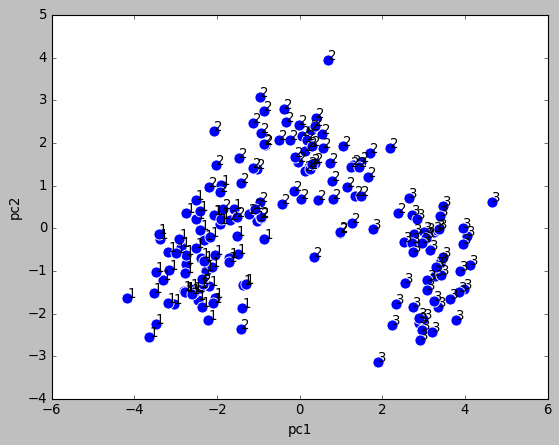

In [49]:
p1 = sns.scatterplot(data=finalDf,x='pc1',y='pc2',s = 100)  
for line in range(0,finalDf.shape[0]):
     p1.text(finalDf.pc1[line], finalDf.pc2[line], finalDf.Customer_Segment[line], horizontalalignment='left', size='medium')

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Wine.csv')
df
X = df.iloc[:, :13].values
y = df.iloc[:, 13].values

df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [53]:
from sklearn.preprocessing import StandardScaler
X_sca = StandardScaler()
X_train = X_sca.fit_transform(X_train)
X_test = X_sca.transform(X_test)

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
print (explained_variance_ratio)

[0.36320243 0.18308508 0.11431932 0.07379582 0.0672079  0.04767972
 0.04126891 0.02971002 0.02330387 0.01895605 0.0163676  0.01269982
 0.00840346]


In [55]:
var1 = np.cumsum(np.round(explained_variance_ratio,decimals = 4)*100)
var1

array([ 36.32,  54.63,  66.06,  73.44,  80.16,  84.93,  89.06,  92.03,
        94.36,  96.26,  97.9 ,  99.17, 100.01])

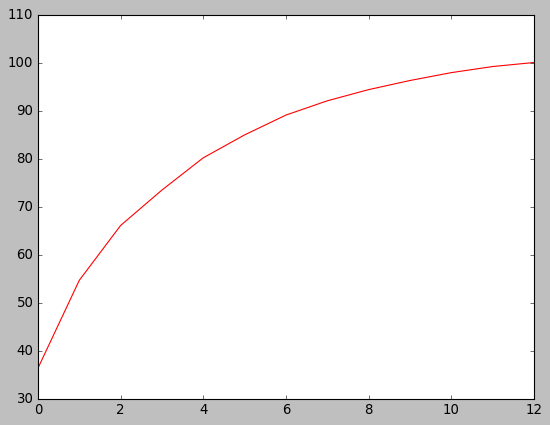

In [57]:
plt.plot(var1,color="red")

In [59]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print (explained_variance)

[0.66485581 0.33514419]


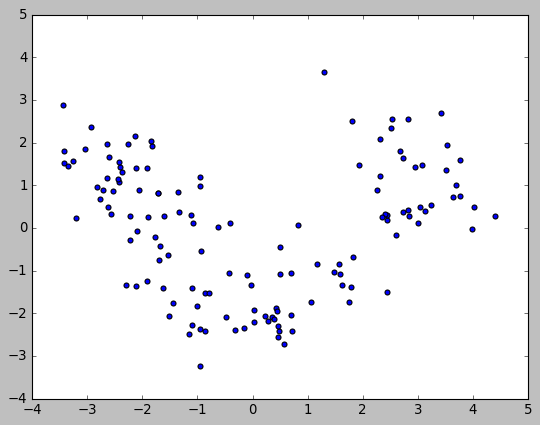

In [60]:
plt.scatter([x[0] for x in X_train], [x[1] for x in X_train])
plt.show()

In [62]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [63]:
y_pred = clf.predict(X_test)

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[15,  0,  0],
       [ 0, 16,  0],
       [ 0,  1, 13]], dtype=int64)

In [65]:
clf.score(X_test, y_test)

0.9777777777777777